In [1]:
import pandas as pd
import yfinance as yf
from datetime import datetime
from datetime import timedelta
import plotly.graph_objects as go
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
import warnings

warnings.filterwarnings('ignore')

pd.options.display.float_format='${:,.2f}'.format

c:\Users\avina\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# import dataset

today=datetime.today().strftime('%Y-%m-%d')
start_date='2016-01-01'

df=yf.download('BTC-USD',start_date,today)                                

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600
...,...,...,...,...,...,...
2023-11-18,"$36,625.37","$36,839.28","$36,233.31","$36,585.70","$36,585.70",11886022717
2023-11-19,"$36,585.77","$37,509.36","$36,414.60","$37,386.55","$37,386.55",12915986553
2023-11-20,"$37,374.07","$37,756.82","$36,882.53","$37,476.96","$37,476.96",20888209068


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-18,"$36,625.37","$36,839.28","$36,233.31","$36,585.70","$36,585.70",11886022717
2023-11-19,"$36,585.77","$37,509.36","$36,414.60","$37,386.55","$37,386.55",12915986553
2023-11-20,"$37,374.07","$37,756.82","$36,882.53","$37,476.96","$37,476.96",20888209068
2023-11-21,"$37,469.16","$37,631.14","$35,813.81","$35,813.81","$35,813.81",25172163756
2023-11-22,"$35,756.55","$37,856.98","$35,670.97","$37,432.34","$37,432.34",24397247860


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,"$2,883.00","$2,883.00","$2,883.00","$2,883.00","$2,883.00","$2,883.00"
mean,"$16,541.78","$16,932.22","$16,119.58","$16,553.06","$16,553.06","$19,172,592,785.65"
std,"$16,166.39","$16,561.68","$15,718.38","$16,164.99","$16,164.99","$19,394,026,212.78"
min,$365.07,$374.95,$354.91,$364.33,$364.33,"$28,514,000.00"
25%,"$4,072.29","$4,143.98","$3,988.88","$4,074.95","$4,074.95","$3,709,710,000.00"
50%,"$9,533.78","$9,711.89","$9,347.59","$9,538.02","$9,538.02","$15,735,797,744.00"
75%,"$26,834.21","$27,242.72","$26,484.71","$26,851.15","$26,851.15","$29,839,125,113.00"
max,"$67,549.73","$68,789.62","$66,382.06","$67,566.83","$67,566.83","$350,967,941,479.00"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2883 entries, 2016-01-01 to 2023-11-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2883 non-null   float64
 1   High       2883 non-null   float64
 2   Low        2883 non-null   float64
 3   Close      2883 non-null   float64
 4   Adj Close  2883 non-null   float64
 5   Volume     2883 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.7 KB


In [8]:
df.isnull().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [9]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.reset_index(inplace=True)
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,$430.72,$436.25,$427.52,$434.33,$434.33,36278900
1,2016-01-02,$434.62,$436.06,$431.87,$433.44,$433.44,30096600
2,2016-01-03,$433.58,$433.74,$424.71,$430.01,$430.01,39633800
3,2016-01-04,$430.06,$434.52,$429.08,$433.09,$433.09,38477500
4,2016-01-05,$433.07,$434.18,$429.68,$431.96,$431.96,34522600


In [12]:
df1=df[["Date","Open"]]

In [13]:
df1.head()

,Date,Open
0,2016-01-01,$430.72
1,2016-01-02,$434.62
2,2016-01-03,$433.58
3,2016-01-04,$430.06
4,2016-01-05,$433.07


In [14]:
new_names={
    "Date":"ds",
    "Open":"y",
}
df1.rename(columns=new_names,inplace=True)

In [15]:
df1.head()

,ds,y
0,2016-01-01,$430.72
1,2016-01-02,$434.62
2,2016-01-03,$433.58
3,2016-01-04,$430.06
4,2016-01-05,$433.07


In [16]:
x=df1["ds"]
y=df1["y"]

fig=go.Figure()

fig.add_trace(go.Scatter(x=x,y=y))

# Set title
fig.update_layout(
title_text="Time series plot of Bitcoin open Price",
)

fig.update_layout(
    xaxis=dict(
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        )
    ),
    rangeslider=dict(visible=True),
    type="date",
    )
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'type': 'scatter',
              'x': array([datetime.datetime(2016, 1, 1, 0, 0),
                          datetime.datetime(2016, 1, 2, 0, 0),
                          datetime.datetime(2016, 1, 3, 0, 0), ...,
                          datetime.datetime(2023, 11, 20, 0, 0),
                          datetime.datetime(2023, 11, 21, 0, 0),
                          datetime.datetime(2023, 11, 22, 0, 0)], dtype=object),
              'y': array([  430.7210083 ,   434.62200928,   433.57800293, ..., 37374.07421875,
                          37469.16015625, 35756.5546875 ])}],
    'layout': {'template': '...',
               'title': {'text': 'Time series plot of Bitcoin open Price'},
               'xaxis': {'rangeselector': {'buttons': [{'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': 'YTD', 'step': 'year', 'stepmode': 'todate'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider': {'visible': True},
                         'type': 'date'}}
})

In [ ]:
# model 1
#In this time series,
#the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with
#the trend. This is multiplicative seasonality.

model=Prophet(
    seasonality_mode="multiplicative"
)

model.fit(df1)

20:17:39 - cmdstanpy - INFO - Chain [1] start processing
20:17:40 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
future=model.make_future_dataframe(periods=365)
future.tail()

,ds
3241,2024-11-15
3242,2024-11-16
3243,2024-11-17
3244,2024-11-18
3245,2024-11-19


In [ ]:
#Evaluating the model
forecast=model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2016-01-01,$39.56,"$-4,955.79","$5,061.65",$39.56,$39.56,$-0.01,$-0.01,$-0.01,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$-0.00,$0.00,$0.00,$0.00,$39.34
1,2016-01-02,$42.01,"$-4,419.21","$4,364.24",$42.01,$42.01,$0.00,$0.00,$0.00,$-0.00,$-0.00,$-0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$0.00,$42.04
2,2016-01-03,$44.47,"$-4,833.57","$4,968.15",$44.47,$44.47,$0.01,$0.01,$0.01,$-0.00,$-0.00,$-0.00,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$44.72
3,2016-01-04,$46.93,"$-4,325.33","$4,651.64",$46.93,$46.93,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$47.42
4,2016-01-05,$49.39,"$-4,829.40","$4,798.87",$49.39,$49.39,$0.01,$0.01,$0.01,$-0.00,$-0.00,$-0.00,$0.01,$0.01,$0.01,$0.00,$0.00,$0.00,$49.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,2024-11-15,"$26,880.42","$9,945.83","$49,622.52","$9,623.20","$45,792.73",$0.07,$0.07,$0.07,$-0.00,$-0.00,$-0.00,$0.07,$0.07,$0.07,$0.00,$0.00,$0.00,"$28,641.73"
3242,2024-11-16,"$26,881.58","$9,175.80","$50,060.98","$9,550.13","$45,862.23",$0.06,$0.06,$0.06,$-0.00,$-0.00,$-0.00,$0.06,$0.06,$0.06,$0.00,$0.00,$0.00,"$28,559.65"
3243,2024-11-17,"$26,882.73","$9,593.64","$49,676.60","$9,477.99","$45,959.07",$0.06,$0.06,$0.06,$-0.00,$-0.00,$-0.00,$0.06,$0.06,$0.06,$0.00,$0.00,$0.00,"$28,461.60"
3244,2024-11-18,"$26,883.89","$9,782.68","$49,145.13","$9,405.86","$46,059.38",$0.06,$0.06,$0.06,$0.00,$0.00,$0.00,$0.05,$0.05,$0.05,$0.00,$0.00,$0.00,"$28,369.67"


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3241,2024-11-15,"$28,641.73","$9,945.83","$49,622.52"
3242,2024-11-16,"$28,559.65","$9,175.80","$50,060.98"
3243,2024-11-17,"$28,461.60","$9,593.64","$49,676.60"
3244,2024-11-18,"$28,369.67","$9,782.68","$49,145.13"
3245,2024-11-19,"$28,203.34","$9,543.23","$49,375.81"


In [ ]:
next_day=(datetime.today()+timedelta(days=1)).strftime('%Y-%m-%d')

print(f"Predicted Bitcoin price for {next_day} is {forecast[forecast['ds']==next_day]['yhat'].item()}")

Predicted Bitcoin price for 2023-11-22 is 27416.382981354895


In [ ]:
plot_plotly(model,forecast)

In [ ]:
plot_components_plotly(model,forecast)

In [ ]:
# Cross Validation

from prophet.diagnostics import cross_validation

In [ ]:
df_cv=cross_validation(model,horizon='365 days')

  0%|          | 0/8 [00:00<?, ?it/s]

20:17:44 - cmdstanpy - INFO - Chain [1] start processing
20:17:45 - cmdstanpy - INFO - Chain [1] done processing
20:17:45 - cmdstanpy - INFO - Chain [1] start processing
20:17:46 - cmdstanpy - INFO - Chain [1] done processing
20:17:46 - cmdstanpy - INFO - Chain [1] start processing
20:17:47 - cmdstanpy - INFO - Chain [1] done processing
20:17:48 - cmdstanpy - INFO - Chain [1] start processing
20:17:48 - cmdstanpy - INFO - Chain [1] done processing
20:17:49 - cmdstanpy - INFO - Chain [1] start processing
20:17:50 - cmdstanpy - INFO - Chain [1] done processing
20:17:50 - cmdstanpy - INFO - Chain [1] start processing
20:17:51 - cmdstanpy - INFO - Chain [1] done processing
20:17:51 - cmdstanpy - INFO - Chain [1] start processing
20:17:53 - cmdstanpy - INFO - Chain [1] done processing
20:17:53 - cmdstanpy - INFO - Chain [1] start processing
20:17:54 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2915,2023-11-16,"$-14,952.18","$-44,126.38","$9,008.87","$37,879.98",2022-11-20
2916,2023-11-17,"$-14,990.31","$-44,867.89","$9,629.65","$36,164.82",2022-11-20
2917,2023-11-18,"$-15,073.93","$-44,771.34","$9,435.93","$36,625.37",2022-11-20
2918,2023-11-19,"$-15,155.39","$-44,442.31","$8,295.54","$36,585.77",2022-11-20
2919,2023-11-20,"$-15,236.44","$-45,273.39","$9,646.99","$37,374.07",2022-11-20


In [ ]:
from prophet.diagnostics import performance_metrics

In [ ]:
df_performance=performance_metrics(df_cv)

In [ ]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days 12:00:00,"$49,378,251.92","$7,026.97","$4,968.10",$0.30,$0.19,$0.26,$0.27
1,37 days 00:00:00,"$53,151,214.35","$7,290.49","$5,099.78",$0.31,$0.19,$0.27,$0.26
2,37 days 12:00:00,"$53,531,177.36","$7,316.50","$5,129.11",$0.31,$0.19,$0.27,$0.27
3,38 days 00:00:00,"$57,795,369.25","$7,602.33","$5,272.55",$0.32,$0.19,$0.27,$0.26
4,38 days 12:00:00,"$58,117,205.69","$7,623.46","$5,293.84",$0.32,$0.19,$0.27,$0.27
...,...,...,...,...,...,...,...,...
653,363 days 00:00:00,"$2,226,604,883.70","$47,186.91","$36,843.76",$1.24,$0.77,$0.95,$0.37
654,363 days 12:00:00,"$2,208,534,443.72","$46,995.05","$36,604.45",$1.23,$0.75,$0.94,$0.38
655,364 days 00:00:00,"$2,222,358,883.09","$47,141.90","$36,769.31",$1.25,$0.75,$0.94,$0.37
656,364 days 12:00:00,"$2,204,601,635.51","$46,953.19","$36,539.29",$1.23,$0.75,$0.94,$0.38


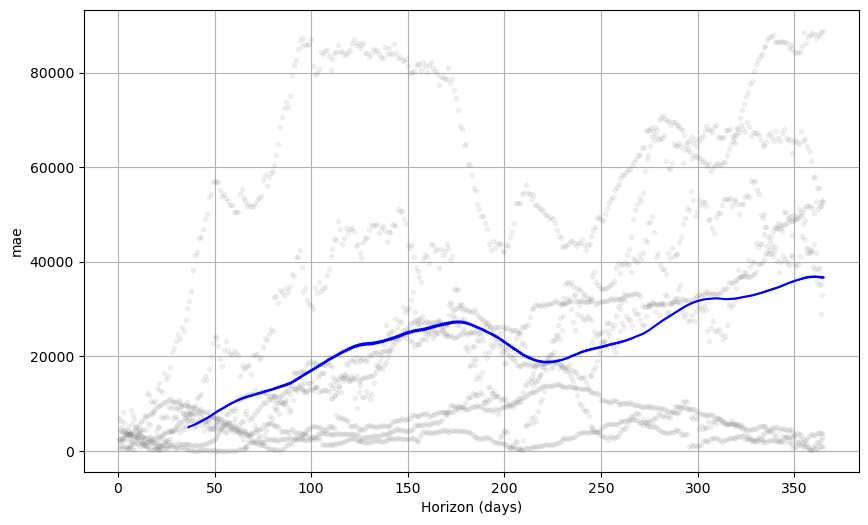

In [ ]:
from prophet import plot
fig2=plot.plot_cross_validation_metric(df_cv,metric='mae')

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from prophet.diagnostics import performance_metrics

forecast = model.predict(future)
y_true = df1['y']
forecast_upto_today = forecast[forecast['ds'] < datetime.today().strftime('%Y-%m-%d')]
y_pred = forecast_upto_today['yhat']
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2): {r2}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2588.767299921298
Mean Squared Error (MSE): 13959902.26489394
R-squared (R2): 0.9465470783862033
Root Mean Squared Error (RMSE): 3736.295259330282


In [ ]:
from prophet import Prophet

# model 2

model2=Prophet(
    seasonality_mode="multiplicative",
    
    # Hyperparameter tuning
    changepoint_prior_scale=0.5,
    seasonality_prior_scale=10,
)

model2.fit(df1)

forecast2 = model2.predict(future)
y_true = df1['y']
forecast_upto_today2 = forecast2[forecast2['ds'] < datetime.today().strftime('%Y-%m-%d')]
y_pred = forecast_upto_today2['yhat']
mae = mean_absolute_error(y_true, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
r2 = r2_score(y_true, y_pred)
print(f"R-squared (R2): {r2}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

20:17:59 - cmdstanpy - INFO - Chain [1] start processing
20:18:00 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 1671.509710491076
Mean Squared Error (MSE): 6787588.628805856
R-squared (R2): 0.974010101500878
Root Mean Squared Error (RMSE): 2605.30010340572


In [ ]:
# Next day Bit coin price prediction

next_day=(datetime.today()+timedelta(days=1)).strftime('%Y-%m-%d')

print(f"Predicted Bitcoin price for {next_day} is {forecast2[forecast2['ds']==next_day]['yhat'].item()}")

Predicted Bitcoin price for 2023-11-22 is 25470.31289617704


In [ ]:
# Saving the model 2

import pickle
pickle.dump(model2,open('bitcoin_fbprophet.pkl','wb'))

In [ ]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.metrics import mean_squared_error
import numpy as np

# Load historical Bitcoin price data
symbol = "BTC-USD"
start_date = "2019-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
bitcoin_data = yf.download(symbol, start=start_date, end=end_date)

# Prepare the data for Prophet
df = pd.DataFrame()
df['ds'] = bitcoin_data.index
df['y'] = bitcoin_data['Close'].values

# Feature Engineering
# Add additional features, such as daily returns, moving averages, and volatility
df['returns'] = df['y'].pct_change()
df['ma7'] = df['y'].rolling(window=7).mean()
df['ma30'] = df['y'].rolling(window=30).mean()
df['volatility'] = df['returns'].rolling(window=7).std()
df = df.dropna()

# model 3

# Instantiate the Prophet model
model3 = Prophet(changepoint_prior_scale=0.05, yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)

# Add additional regressors
model3.add_regressor('ma7')
model3.add_regressor('ma30')
model3.add_regressor('volatility')

# Fit the model
model3.fit(df)

# Create a dataframe for the next day
future = model3.make_future_dataframe(periods=1, freq='D', include_history=False)

# Add regressor values for the next day
# Adjust these values based on the actual values for the next day
future['ma7'] = df['ma7'].values[-1]
future['ma30'] = df['ma30'].values[-1]
future['volatility'] = df['volatility'].values[-1]

# Make predictions for the next day
forecast = model3.predict(future)

# Extract the predicted closing price for the next day
predicted_price = forecast['yhat'].iloc[0]

# Get the actual closing price for the next day
actual_price = yf.download(symbol, start=end_date, end=(datetime.today() + timedelta(days=1)).strftime('%Y-%m-%d'))['Close'].iloc[0]

# Calculate the absolute error
error = abs(predicted_price - actual_price)

print("Predicted Price:", predicted_price)
print("Actual Price:", actual_price)
print("Absolute Error:", error)

# Evaluate model performance on historical data
df['y_pred'] = model3.predict(df[['ds', 'ma7', 'ma30', 'volatility']])['yhat']
df = df.dropna()
mse = mean_squared_error(df['y'], df['y_pred'])
rmse = np.sqrt(mse)
r2 = r2_score(df['y'], df['y_pred'])

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print(f"R-squared (R2): {r2}")

# Plot the forecast and components
fig_forecast = plot_plotly(model3, forecast)
fig_components = plot_components_plotly(model3, forecast)
fig_forecast.show()
fig_components.show()


[*********************100%%**********************]  1 of 1 completed


20:18:03 - cmdstanpy - INFO - Chain [1] start processing
20:18:03 - cmdstanpy - INFO - Chain [1] done processing


[*********************100%%**********************]  1 of 1 completed
Predicted Price: 36858.498466637975
Actual Price: 36701.00390625
Absolute Error: 157.49456038797507
Mean Squared Error (MSE): 33515723.334220834
Root Mean Squared Error (RMSE): 5789.276581250962
R-squared (R2): 0.8693501499184295
